In [1]:
import pyramses
import cmath
import math
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import (inset_axes, InsetPosition, mark_inset, zoomed_inset_axes)
from matplotlib import rc
import pandas as pd
import datetime
import seaborn as sns
import json, codecs
import os
from plot_strong_weak import plot_strong_weak
from save_figure import save_figure

# from importnb import Notebook
# with Notebook(): 
#     from CIGRE18_multisim import VAR
# print(VAR)

# Set plot options
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
cm = 1/2.54
sns.set_context("paper", font_scale = 0.7, rc={"grid.linewidth": 0.6})
rc('font', **{'family': 'sans-serif', 'sans-serif': ['Helvetica']})
rc('font', **{'family': 'serif', 'serif': ['Palatino']})
rc('text', usetex=True)
# colors_ blue, red, yellow, green. purple gray light blue dark blue dark green
palette1 = ["#1269b0","#a8322d",'#edb120','#72791c', "#91056a", '#6f6f64', '#007a96', '#1f407a','#485a2c']
# palette = ["#1269b0","#a8322d", "#91056a", '#edb120','#72791c', '#6f6f64', '#007a96', '#1f407a','#485a2c']
# sns.set_palette(palette1)
# sns.cubehelix_palette(start=.5, rot=-.5, as_cmap=True)

In [2]:
# Current date

today = datetime.date.today()
# date = today
date = "2022-04-07"

# folder = 'strong grid'
directory = ".\\" +  str(date) + "\\" 
# KP_P = np.linspace(0,2,11)
# Tp2 = [0, 1]
# Loop over the different loads
atls = ['TL1', 'TL11', 'TL15', 'TL16', 'TL17', 'TL18'] 
# Loop over the different files

# types = ['on', 'off', 'droop']
# types = ['active', 'inactive', 'droop']
# names = ['weak', 'strong']
# names = names_weak
# fig_name = 'strong-weak comparison'
# # names_hyst = []

# # VAR = KP_P
# # replace_str = "KP_P"
# var_path = ".\\" + str(today) + "\\var.json"
# obj_text = codecs.open(var_path, 'r', encoding='utf-8').read()
# VAR = json.loads(obj_text)
# var_str = list(VAR.keys())[0]

# out_dir = ".\\" + str(today) + "\\" + var_str + "\\"
# # Get the parameters
# with open(out_dir + 'parameters.json', 'r') as openfile:
#     parameters = json.load(openfile)
    

# fig_title = var_str + ' variation'
# fig_name = var_str + ' variation'
# for parameter in parameters:
#     fig_title += "; " + parameter + "= " + str(parameters[parameter])
#     fig_name += " " + parameter + str(parameters[parameter])
# # print(title)

# for i,var in enumerate(VAR[var_str]):
#     names.append('out_' + var_str + str(i))
#     # names_hyst.append('out_hyst' + str(i))

In [3]:
# ext = {}
names=['weak', 'strong']
types = np.arange(1,7)
variables = ['time [s]', '$f$ [Hz]', '$v$ [p.u.]']
fig_name = 'atl share'
events_left = {
    'Power drop': 2,
    '$LoE = 1$':2.5,
    '2 units shut down (centralized control)': 3.65,
    '2 units shut down (droop control)': 5.1
}
events_right = {
    'Power drop': 2,
    '$LoE = 1$':2.5,
}

parameters_weak = '\n'.join(('$H = 1.5$ s',
                             '$\Delta P = 1.5$ MW',
                             # "ATLs' load share = 20\%"
                            ))
parameters_strong = '\n'.join(('$H = 6$ s',
                              '$\Delta P = 1.5$ MW',
                              # "ATLs' load share = 20\%"
                             ))

In [4]:
A = []
B = []
C = variables*len(types)*2
D = []
for name in names:
    for var in variables:
        for typ in types:
            A += [name]
for name in names:
    for typ in types:
        for var in variables:
            B += [typ]

for name in names:
    for typ in types:
        # ext1 = pyramses.extractor(directory + name + '_' + typ + ".trj")
        ext = pyramses.extractor(directory + name + '_' + str(typ) + ".trj")
        D.append(ext.getSync('G').S.time)
        D.append(ext.getSync('G').S.value*50)
        D.append(ext.getBus('114115').mag.value)
df = pd.DataFrame(zip(A, B, C, D), columns=['name','type', 'value','data'])
df.set_index(['name', 'type', 'value'], inplace=True)
df

data
name   type value                                                        
weak   1    time [s]    [0.0, 0.001, 0.001, 0.002, 0.012, 0.022, 0.032...
            $f$ [Hz]    [50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50....
            $v$ [p.u.]  [0.9151193999999999, 0.9151193999999999, 0.915...
       2    time [s]    [0.0, 0.001, 0.001, 0.002, 0.012, 0.022, 0.032...
            $f$ [Hz]    [50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50....
            $v$ [p.u.]  [0.9151193999999999, 0.9151193999999999, 0.915...
       3    time [s]    [0.0, 0.001, 0.001, 0.002, 0.012, 0.022, 0.032...
            $f$ [Hz]    [50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50....
            $v$ [p.u.]  [0.9151193999999999, 0.9151193999999999, 0.915...
       4    time [s]    [0.0, 0.001, 0.001, 0.002, 0.012, 0.022, 0.032...
            $f$ [Hz]    [50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50....
            $v$ [p.u.]  [0.9151193999999999, 0.9151193999999999, 0.915...
       5    time [s]    [0.0, 0.001, 0.001, 0.002, 0.012, 0.022, 0.032...
            $f$ [Hz]    [50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50....
            $v$ [p.u.]  [0.9151193999999999, 0.9151193999999999, 0.915...
       6    time [s]    [0.0, 0.001, 0.001, 0.002, 0.012, 0.022, 0.032...
            $f$ [Hz]    [50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50....
            $v$ [p.u.]  [0.9151193999999999, 0.9151193999999999, 0.915...
strong 1    time [s]    [0.0, 0.001, 0.001, 0.002, 0.012, 0.022, 0.032...
            $f$ [Hz]    [50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50....
            $v$ [p.u.]  [0.9398172, 0.9398172, 0.9398172, 0.9398172, 0...
       2    time [s]    [0.0, 0.001, 0.001, 0.002, 0.012, 0.022, 0.032...
            $f$ [Hz]    [50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50....
            $v$ [p.u.]  [0.9398172, 0.9398172, 0.9398172, 0.9398172, 0...
       3    time [s]    [0.0, 0.001, 0.001, 0.002, 0.012, 0.022, 0.032...
            $f$ [Hz]    [50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50....
            $v$ [p.u.]  [0.9398172, 0.9398172, 0.9398172, 0.9398172, 0...
       4    time [s]    [0.0, 0.001, 0.001, 0.002, 0.012, 0.022, 0.032...
            $f$ [Hz]    [50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50....
            $v$ [p.u.]  [0.9398172, 0.9398172, 0.9398172, 0.9398172, 0...
       5    time [s]    [0.0, 0.001, 0.001, 0.002, 0.012, 0.022, 0.032...
            $f$ [Hz]    [50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50....
            $v$ [p.u.]  [0.9398172, 0.9398172, 0.9398172, 0.9398172, 0...
       6    time [s]    [0.0, 0.001, 0.001, 0.002, 0.012, 0.022, 0.032...
            $f$ [Hz]    [50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50....
            $v$ [p.u.]  [0.9398172, 0.9398172, 0.9398172, 0.9398172, 0...

In [5]:
df['data']['strong'][5]


value
time [s]      [0.0, 0.001, 0.001, 0.002, 0.012, 0.022, 0.032...
$f$ [Hz]      [50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50....
$v$ [p.u.]    [0.9398172, 0.9398172, 0.9398172, 0.9398172, 0...
Name: data, dtype: object

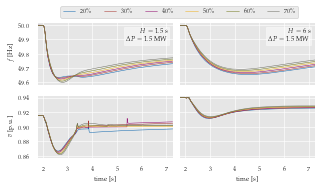

In [6]:
pt = 1/72.27
# plt.style.use("ggplot")
# sns.set_palette(palette1)
fig,axs = plt.subplots(2,2, figsize = (360*pt, 180*pt), sharex='col', sharey = 'row')
# fig.suptitle("\detokenize{"+ fig_title +"}")
fig.subplots_adjust(hspace=0.15, wspace = 0.05)
axs = axs.ravel()
for typ in types:
    sns.lineplot(ax=axs[0], y=C[1], x=C[0], data=df['data']['weak'][typ],linewidth=0.5, label=str(typ*10+10)+'\%', legend = False)
    sns.lineplot(ax=axs[1], y=C[1], x=C[0], data=df['data']['strong'][typ],linewidth=0.5, label=typ, legend = False)
    sns.lineplot(ax=axs[2], y=C[2], x=C[0], data=df['data']['weak'][typ],linewidth=0.5, label=typ, legend = False)
    sns.lineplot(ax=axs[3], y=C[2], x=C[0], data=df['data']['strong'][typ],linewidth=0.5, label=typ, legend = False)

# for event, time in events_left.items():  
#     for ax in axs[0],axs[2]:
#         ax.axvline(x = time, color = 'grey', linewidth=0.5)
#     axs[0].text(time+0.05, 50, event) # to correct the height for the data present.
# for event, time in events_right.items():  
#     for ax in axs[1],axs[3]:
#         ax.axvline(x = time, color = 'grey', linewidth=0.5)
#     axs[1].text(time+0.05, 50, event) # to correct the height for the data present.
axs[2].set_xlim([1.75,7.25])    
axs[3].set_xlim([1.75,7.25])    
fig.align_ylabels(axs[:])
axs[0].legend(loc = 'upper center', bbox_to_anchor=(1.05, 1.3), ncol=len(types))
# axs[0].set_title('Weak grid')
# axs[1].set_title('Strong grid')

props = dict(boxstyle='square', facecolor='white', alpha=0.5)
axs[0].text(0.96, 0.90,parameters_weak, bbox=props, transform=axs[0].transAxes, ha = 'right', va = 'top')
axs[1].text(0.96, 0.90,parameters_strong, bbox=props, transform=axs[1].transAxes, ha = 'right', va = 'top')

str_i = "" 
i = 0
while True:
    if not os.path.exists(directory + fig_name + str_i + '.png'):
        fig.savefig(directory + fig_name + str_i + '.png',bbox_inches='tight', dpi = 300)

        break
    else:
        i += 1
        str_i = " " + str(i) 

In [7]:
# %run plot_strong_weak.py
# plot_strong_weak(types, directory, 2, fig_name)

FileNotFoundError: [Errno 2] No such file or directory: '.\\2022-04-07\\out_1.trj'

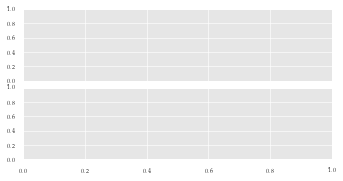

In [8]:
fig_name = 'sum of loads comparison'
MVbuses = [i for i in range(1101,1176)]
LVbuses = [i for i in range(1,19)]
LVbuses_loads = [1,11,15,16,17,18]
LVbuses_PV = [11,15,16,17,18]
buses = []
loads = []
PVs = []
TLs = []
IMs = []
for MVbus in MVbuses:
    for LVbus in LVbuses:
        buses.append(str(MVbus) + str(LVbus).zfill(2))
    for LVbus in LVbuses_loads:
        loads.append("IMP" + str(MVbus) + str(LVbus).zfill(2))
    for LVbus in LVbuses_PV:
        PVs.append("PV" + str(MVbus) + str(LVbus).zfill(2))
    for LVbus in LVbuses_loads:
        TLs.append("ATL" + str(MVbus) + str(LVbus).zfill(2))
    for LVbus in LVbuses_loads:
        IMs.append("IND" + str(MVbus) + str(LVbus).zfill(2))


    
fig,axs = plt.subplots(2,1, figsize = (400*pt,2*100*pt), sharex='col', sharey = 'row')
fig.subplots_adjust(hspace=0.1, wspace = 0.05)
axs = axs.ravel()
for i in range(1,7):
    P_active = 0
    P_active_load = 0
    P_inactive = 0
    P_droop = 0    
    P_nb = 0
    Q_active = 0
    Q_inactive = 0
    Q_droop = 0    
    Q_nb = 0
    ext=pyramses.extractor(directory + "out_"+ str(i) + ".trj")
    for IMP in TLs:
        P_active += ext.getInj(IMP).P.value
    for IMP in loads:
        P_active_load += ext.getInj(IMP).P.value
        # Q_active += ext.getInj(IMP).Q.value
    axs[0].plot(ext.getInj('ATL117511').P.time, P_active, label=str(i*10+10)+'\%')
    axs[1].plot(ext.getInj('IMP117511').P.time, P_active_load, label=str(i*10+10)+'\%')
# ext=pyramses.extractor(directory + "weak_neighbourhood.trj")
# for IMP in PVs:
#     P_nb += ext.getInj(IMP).Pgen.value
#     Q_nb += ext.getInj(IMP).Qgen.value
# axs[0].plot(ext.getInj('PV117511').Pgen.time, P_nb,  label = 'neighbourhood')
# axs[1].plot(ext.getInj('PV117511').Qgen.time, Q_nb,  label = 'neighbourhood')
# ext=pyramses.extractor(directory + "weak_droop.trj")
# for IMP in PVs:
#     P_droop += ext.getInj(IMP).Pgen.value
#     Q_droop += ext.getInj(IMP).Qgen.value
# axs[0].plot(ext.getInj('PV117511').Pgen.time, P_droop,  label = 'droop')
# axs[1].plot(ext.getInj('PV117511').Qgen.time, Q_droop,  label = 'droop')
# ext=pyramses.extractor(directory + "weak_inactive.trj")
# for IMP in PVs:
#     P_inactive += ext.getInj(IMP).Pgen.value
#     Q_inactive += ext.getInj(IMP).Qgen.value
# axs[0].plot(ext.getInj('PV117511').Pgen.time, P_inactive,  label = 'inactive')
# axs[1].plot(ext.getInj('PV117511').Qgen.time, Q_inactive,  label = 'inactive')


axs[0].set_ylabel('$P_{ATL}$ [MW]')
axs[0].legend(loc = 'lower center', bbox_to_anchor=(0.5, 1.01), ncol=len(types))
axs[1].set_xlim([1.75,7.25])
axs[1].set_xlabel('time [s]')
axs[1].set_ylabel('$P_{ex}$ [MW]')
save_figure(directory, fig_name, fig)

In [ ]:
Fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1, figsize =(9*cm,12.5*cm), sharex=True) 
Fig.suptitle('ATL110111')
# Loop over some different simulation results stored in different trj files

for name in names:
    ext = pyramses.extractor(directory+"out_2.trj")
    data = pd.DataFrame(data = ext.getSync('G').S.time, columns=["time"])
#     data["pt"] = ext.getBranch('TxMAIN').PF.value*1000
    data["wm"] = ext.getInj('ATL110111').wm.value
    data["v"] = ext.getBus('117501').mag.value
    # data["F_help_high"] = ext.getInj('TL117511').F_hlp_high.value
    data["P"] = ext.getInj('ATL110111').P.value*1000
    data["f"] = ext.getSync('G').S.value*50
    # data["f"] = ext.getInj('TL11').f.value

    if name == names[1]:
        ax1 = sns.lineplot(ax=ax1, y="wm", x="time", data=data,linewidth=0.5, label="\detokenize{"+ name +"}", linestyle="--")
        ax2 = sns.lineplot(ax=ax2, y="v", x="time", data=data,linewidth=0.5, label="\detokenize{"+ name +"}", linestyle="--")
        ax3 = sns.lineplot(ax=ax3, y="P", x="time", data=data,linewidth=0.5, label="\detokenize{"+ name +"}", linestyle="--")
        ax4 = sns.lineplot(ax=ax4, y="f", x="time", data=data,linewidth=0.5, label="\detokenize{"+ name +"}", linestyle="--")

#     ax1 = sns.lineplot(ax=ax1, y="pt", x="time", data=data,linewidth=0.5)
    else:
        ax1 = sns.lineplot(ax=ax1, y="wm", x="time", data=data,linewidth=0.5, label="\detokenize{"+ name +"}")
        ax2 = sns.lineplot(ax=ax2, y="v", x="time", data=data,linewidth=0.5, label="\detokenize{"+ name +"}")
        ax3 = sns.lineplot(ax=ax3, y="P", x="time", data=data,linewidth=0.5, label="\detokenize{"+ name +"}")
        ax4 = sns.lineplot(ax=ax4, y="f", x="time", data=data,linewidth=0.5, label="\detokenize{"+ name +"}")


    # Legend

# Plot results for ATL Share
# Axis labels
ax1.set_ylabel(r'$\omega_m$ in p.u.')
ax2.set_ylabel(r'V')
ax3.set_ylabel(r'P in kW')
ax4.set_ylabel(r'$f$ in Hz')
ax4.set_xlabel(r"time in s")

ax1.legend(loc = 'right')
ax2.legend(loc = 'right')
ax3.legend(loc = 'right')
ax4.legend(loc = 'right')

# Axis limits
# ax1.set_xlim([1.25,10.25])
# ax2.set_xlim([1.25,10.25])
# ax3.set_xlim([1.25,10.25])
ax4.set_xlim([1.25,10.25])
plt.savefig(directory + 'values comparison.pdf')



In [ ]:

for i, atl in enumerate(atls):
    i, (ax2,ax3,ax4) = plt.subplots(3,1, figsize =(9*cm,12.5*cm), sharex=True) 
    i.suptitle(atl)
    # Loop over some different simulation results stored in different trj files
    for name in names:
        ext = pyramses.extractor(directory+name+".trj")
        data = pd.DataFrame(data = ext.getSync('G').S.time, columns=["time"])
    #     data["pt"] = ext.getBranch('TxMAIN').PF.value*1000
        data["wm"] = ext.getInj(atl).wm.value
        data["patl"] = ext.getInj(atl).P.value*1000
        data["f"] = ext.getInj(atl).f.value
    #     ax1 = sns.lineplot(ax=ax1, y="pt", x="time", data=data,linewidth=0.5)
        ax2 = sns.lineplot(ax=ax2, y="wm", x="time", data=data,linewidth=0.5, label=name)
        ax3 = sns.lineplot(ax=ax3, y="patl", x="time", data=data,linewidth=0.5, label=name)
        ax4 = sns.lineplot(ax=ax4, y="f", x="time", data=data,linewidth=0.5, label=name)

       
        # Legend
    ax2.legend()
    # Plot results for ATL Share
    # Axis labels
    # ax1.set_ylabel(r'$P_t$ in kW')
    ax2.set_ylabel(r'$\omega_m$ in p.u.')
    ax3.set_ylabel(r'$P_{atl}$ in kW')
    ax4.set_ylabel(r'$f$ in Hz')
    ax4.set_xlabel(r"time in s")


    # Axis limits
    # ax1.set_xlim([-0.25,5.25])
    ax2.set_xlim([-0.25,4.25])
    ax3.set_xlim([-0.25,4.25])
    ax4.set_xlim([-0.25,4.25])

    plt.savefig('.\\' + str(today) + '\\' + atl + '.pdf')
   
    
 